In [1]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#1000개의 데이터를 난수로 생성합니다.
num_vectors = 1000

#4개의 클러스터를 생성합니다.
num_clusters = 4
num_steps = 100
vector_values = []

for i in range(num_vectors):
  if np.random.random() > 0.5:
    vector_values.append([np.random.normal(0.5, 0.6),
                          np.random.normal(0.3, 0.9)])
  else:
    vector_values.append([np.random.normal(2.5, 0.4),
                         np.random.normal(0.8, 0.5)])

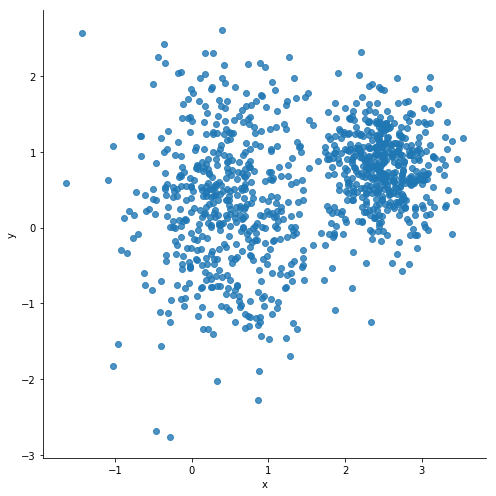

In [3]:
df = pd.DataFrame({"x": [v[0] for v in vector_values], 
                   "y": [v[1] for v in vector_values]})

sns.lmplot("x", "y", data=df, fit_reg=False, size=7)
plt.show()

In [4]:
vectors = tf.constant(vector_values)
centroids = tf.Variable(tf.slice(tf.random_shuffle(vectors), [0,0], [num_clusters,-1]))
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroids = tf.expand_dims(centroids, 1)

print(expanded_vectors.get_shape())
print(expanded_centroids.get_shape())

(1, 1000, 2)
(4, 1, 2)


In [5]:
distances = tf.reduce_sum(tf.square(tf.subtract(expanded_vectors, expanded_centroids)), 2)
assignments = tf.argmin(distances, 0)

In [6]:
means = tf.concat([
  tf.reduce_mean(
      tf.gather(vectors, 
                tf.reshape(
                  tf.where(
                    tf.equal(assignments, c)
                  ),[1,-1])
               ),reduction_indices=[1])
  for c in range(num_clusters)], 0)

update_centroids = tf.assign(centroids, means)

In [7]:
init_op = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init_op)

In [8]:
for step in range(num_steps):
   _, centroid_values, assignment_values = sess.run([update_centroids, centroids, assignments])

print("centroids")
print(centroid_values)

centroids
[[ 0.5546779  -0.856608  ]
 [ 0.47791824  1.4707313 ]
 [ 2.4873822   0.795715  ]
 [ 0.36899495  0.31697655]]
